In [ ]:
!git clone https://github.com/ultralytics/yolov5 

Cloning into 'yolov5'...
remote: Enumerating objects: 9734, done.
remote: Total 9734 (delta 0), reused 0 (delta 0), pack-reused 9734
Receiving objects: 100% (9734/9734), 9.94 MiB | 20.07 MiB/s, done.
Resolving deltas: 100% (6778/6778), done.


In [ ]:
%cd /content/yolov5
%pip install -qr requirements.txt  # install dependencies

/content/yolov5
     |████████████████████████████████| 636 kB 4.2 MB/s 


In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu111 (Tesla K80)


In [ ]:
%cd ..

/content


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/MyDrive/Mask_Detection"

Covid_Mask_Detection.zip


In [ ]:
%cd /content
!unzip /content/gdrive/MyDrive/Mask_Detection/Covid_Mask_Detection.zip 

/content
Archive:  /content/gdrive/MyDrive/Mask_Detection/Covid_Mask_Detection.zip
   creating: test/
   creating: test/images/
  inflating: test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.3135dfc5feab288d76a4ccfd22dfc5bf.jpg  
  inflating: test/images/1224331650_g_400-w_g_jpg.rf.b816f49e2d84044fc997a8cbd55c347d.jpg  
  inflating: test/images/126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.jpg  
  inflating: test/images/1288126-10255706714jpg_jpg.rf.95f7324cbfd48e0386e0660b5e932223.jpg  
  inflating: test/images/15391513324714o1n0r10n6_jpg.rf.a91fbc7be8a94ed3c48d2e4b35bd53bb.jpg  
  inflating: test/images/15391513329330sooq10859_jpg.rf.89c8524c2096175fa2c728e5d73f1c28.jpg  
  inflating: test/images/1579924271_jpg.rf.be5b27c2b2801bccc191e6dbd9bfccca.jpg  
  inflating: test/images/phplpE73q_jpg.rf.bd81cab9f8ff2674ce2e58278f7d37fa.jpg  
  inflating: test/images/r1p00017o8171pnq407_jpg.rf.6fd25b7219a249e97f54fcabf2b52726.jpg  
  inflating: test/images/RTX7C

In [ ]:
%cd /content/yolov5
!pip install wandb

/content/yolov5
     |████████████████████████████████| 1.7 MB 4.3 MB/s 
     |████████████████████████████████| 180 kB 47.5 MB/s 
     |████████████████████████████████| 97 kB 7.0 MB/s 
     |████████████████████████████████| 139 kB 48.9 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=a1d7e62db269cc4bd2fac9e320b9ec2d722c0303758acb3228195275d80a1f7b
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=3eadb1840649fab17338a5ffd41d674dde951d114a0e709a799f646f26f3653b
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [ ]:
!pwd

/content/yolov5


In [ ]:
# Train YOLOv5s on COCO128 for 10 epochs

!python train.py --img 640 --batch 4 --epochs 150 --data coco128.yaml --weights yolov5s.pt --cache 

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=150, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-500-g276b674 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_mo

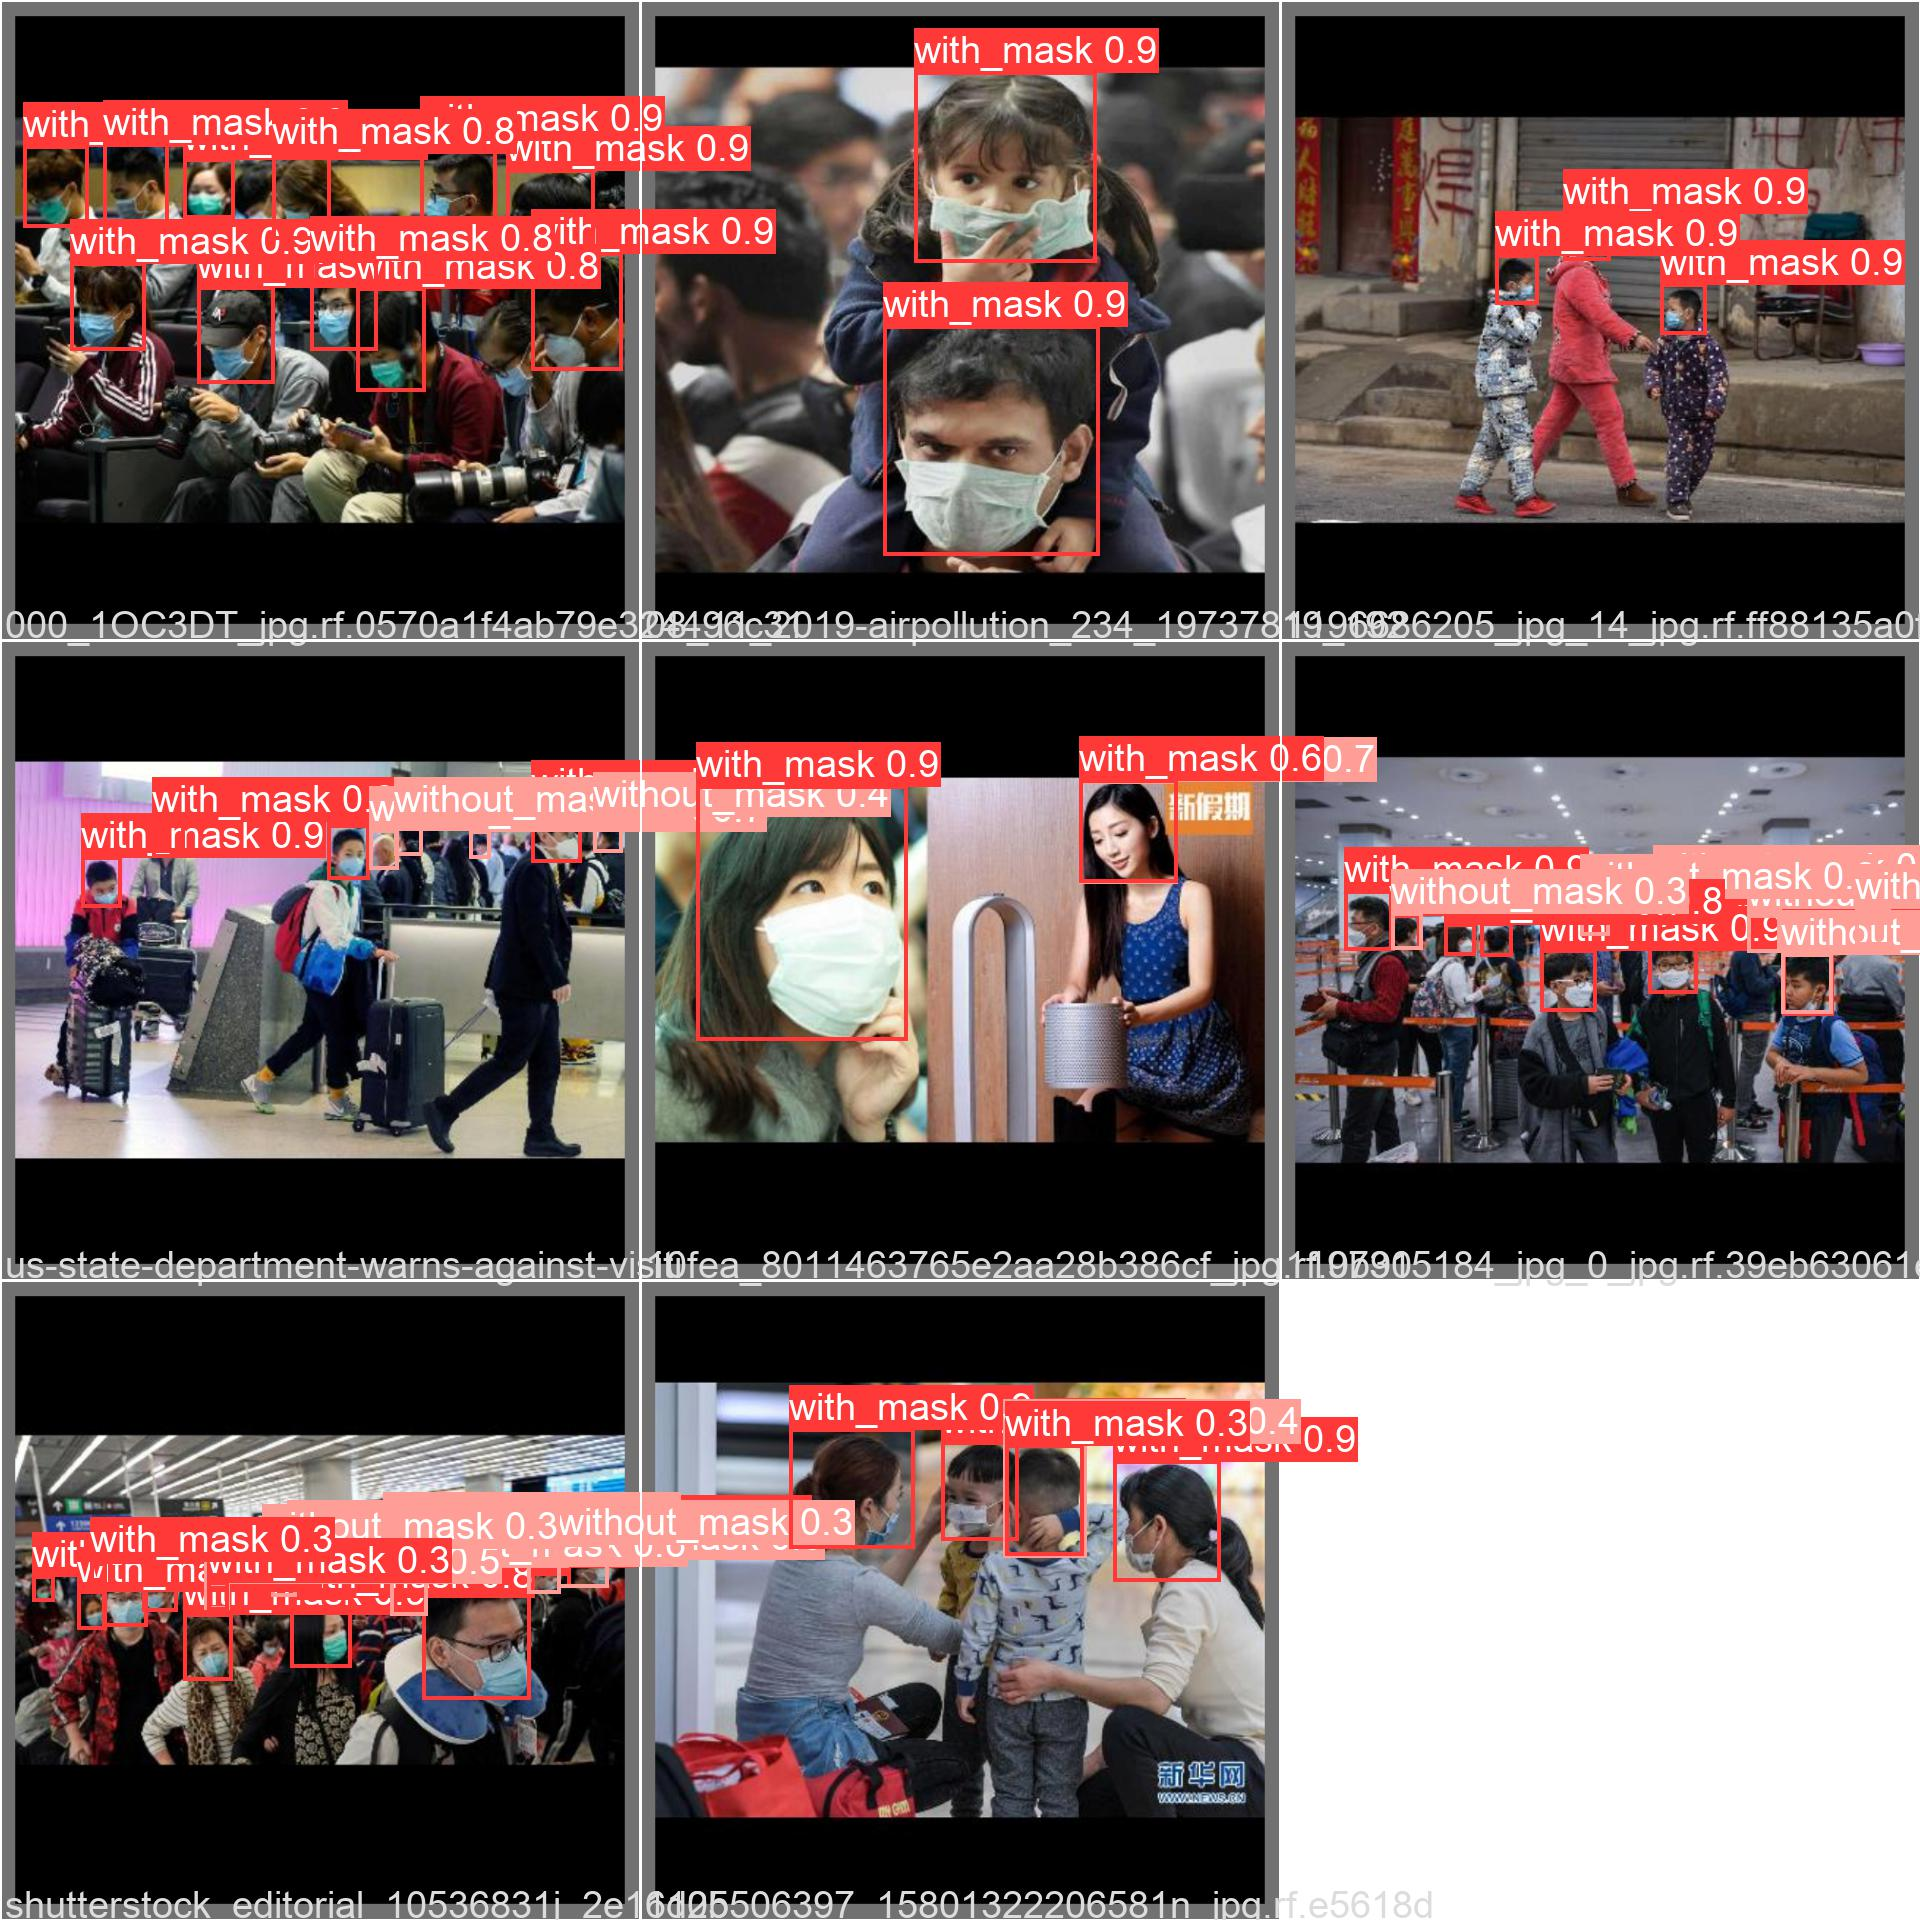

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='/content/yolov5/runs/train/exp/val_batch1_labels.jpg', width=800)  # test batch 0 labels
Image(filename='/content/yolov5/runs/train/exp/val_batch0_pred.jpg', width=800)  # test batch 0 predictions

In [ ]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.4 --source /content/Mask_PSA_Bus.mp4


detect: weights=['runs/train/exp/weights/last.pt'], source=/content/Mask_PSA_Bus.mp4, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-500-g276b674 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPs
video 1/1 (1/1001) /content/Mask_PSA_Bus.mp4: 384x640 4 with_masks, Done. (0.030s)
video 1/1 (2/1001) /content/Mask_PSA_Bus.mp4: 384x640 4 with_masks, Done. (0.028s)
video 1/1 (3/1001) /content/Mask_PSA_Bus.mp4: 384x640 3 with_masks, Done. (0.029s)
video 1/1 (4/1001) /content/Mask_PSA_Bus.mp4: 384x640 3 with_masks, Done. (0.029s)
video 1/1 (5/1001) /content/Mask_PSA_Bus.mp4: 384x640 4 with_masks, 

In [ ]:
pip install -U coremltools onnx scikit-learn==0.19.2


     |████████████████████████████████| 1.5 MB 5.2 MB/s 
     |████████████████████████████████| 12.3 MB 40.9 MB/s 
     |████████████████████████████████| 4.9 MB 31.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 0.9.1 requires scikit-learn>=0.20, but you have scikit-learn 0.19.2 which is incompatible.
imbalanced-learn 0.4.3 requires scikit-learn>=0.20, but you have scikit-learn 0.19.2 which is incompatible.


In [ ]:
!python export.py --weights yolov5s.pt --img 640 --batch 1  # export at 640x640 with batch size 1

export: data=data/coco128.yaml, weights=yolov5s.pt, imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=13, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v5.0-500-g276b674 torch 1.9.0+cu111 CPU

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients

PyTorch: starting from yolov5s.pt (14.8 MB)

TorchScript: starting export with torch 1.9.0+cu111...
/content/yolov5/models/yolo.py:61: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if self.grid[i].shape[2:4] != x[i].shape[2:4] or self.onnx_dynamic:
/content/yolov5/models/yolo.py:61: TracerWarning: Converting a tensor to a Python boolean might cause t